In [7]:
# Read Fashion MNIST dataset

import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Your code goes here . . .

data/fashion/train-labels-idx1-ubyte.gz
data/fashion/t10k-labels-idx1-ubyte.gz


In [8]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import confusion_matrix
encoder = OneHotEncoder(categories='auto')

y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

X_train = (X_train / 255)
X_test = (X_test / 255)

<h4>Model 1: Neural Network with single hidden layer</h4>

Training...


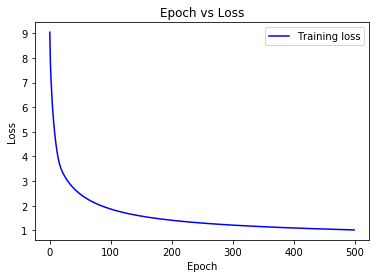

[[680  23  47  80  24   2 107   4  25   8]
 [ 15 882   3  59   7   3  22   0   6   3]
 [ 31   5 528  25 221   9 144   0  35   2]
 [ 77  39  15 681  87   3  77   0  18   3]
 [  9   7 174  69 570  10 137   2  21   1]
 [  5   5   4  11   3 640  28 171  54  79]
 [171   9 189  50 181  14 342   2  36   6]
 [  0   0   2   1   1 122   0 760  19  95]
 [  8   4  41  11  24  32  47  39 773  21]
 [  7   2   0   0   0  62   4  64  20 841]]


Training accuracy :  0.6815833333333333
Test accuracy :  0.6697


In [3]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.neurons = 128
        self.learning_rate = 0.08
        self.theta1 = np.random.randn(self.x.shape[1], self.neurons)
        self.bias1 = np.zeros((1, self.neurons))
        self.theta2 = np.random.randn(self.neurons, self.y.shape[1])
        self.bias2 = np.zeros((1, self.y.shape[1]))
        self.loss = []
    
    def sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def softmax(self, s):
        exps = np.exp(s - np.max(s, axis=1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True)

    def cross_entropy(self, pred, real):
        res = pred - real
        return res/real.shape[0]

    def error(self, pred, real):
        logp = - np.log(pred[np.arange(real.shape[0]), real.argmax(axis=1)])
        loss = np.sum(logp)/real.shape[0]
        return loss
        
    # y = softmax(W2 sigmoid(w1x + b1) + b2)
    def forward_feeding(self):
        self.layer1 = self.sigmoid(np.dot(self.x, self.theta1) + self.bias1)
        self.output = self.softmax(np.dot(self.layer1, self.theta2) + self.bias2)
        
    def back_propagation(self, epoch_count):
        loss = self.error(self.output, self.y)
        self.loss.append(loss)
        
        output_delta = self.cross_entropy(self.output, self.y) # theta2
              
        layer1_output_delta = np.dot(output_delta, self.theta2.T)
        layer1_delta = layer1_output_delta * self.sigmoid_derivative(self.layer1) # theta1
        
        # updating weights here
        self.theta2 -= self.learning_rate * np.dot(self.layer1.T, output_delta)
        self.bias2 -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        
        self.theta1 -= self.learning_rate * np.dot(self.x.T, layer1_delta)
        self.bias1 -= self.learning_rate * np.sum(layer1_delta, axis=0)
       
    
    def train(self, epochs):
        print("Training...")
        for x in range(epochs):
            self.forward_feeding()
            self.back_propagation(x)
        return self.loss
        
        
    def predict(self, x, y):
        accuracy = 0
        for x_val,y_val in zip(x, y):
            self.x = x_val
            self.forward_feeding()
            output = self.output.argmax()
            if output == np.argmax(y_val):
                accuracy += 1
        return accuracy/len(x)
    
    def matrix(self, x):
        self.x = x
        self.forward_feeding()
        return self.output
         
        
model_nn = NeuralNetwork(X_train, y_train)
model_loss = model_nn.train(500)

plt.plot(list(range(len(model_loss))), model_loss, "b", label="Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Epoch vs Loss")
plt.legend()
plt.show()


output = model_nn.matrix(X_test)

confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(output, axis=1))
print(confusion)

print("\n\nTraining accuracy : ", model_nn.predict(X_train, np.array(y_train)))
print("Test accuracy : ", model_nn.predict(X_test, np.array(y_test)))

<h4>Model2: Neural Network with multiple hidden layers</h4>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 24us/step - loss: 1.1107 - acc: 0.6434 - val_loss: 0.6560 - val_acc: 0.7755
Epoch 2/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.5670 - acc: 0.7983 - val_loss: 0.5060 - val_acc: 0.8218
Epoch 3/10
48000/48000 [==============================] - 1s 20us/step - loss:

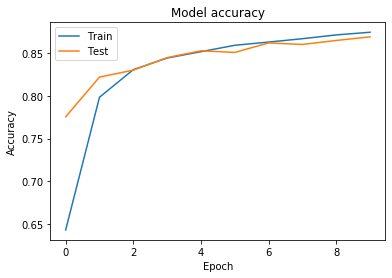

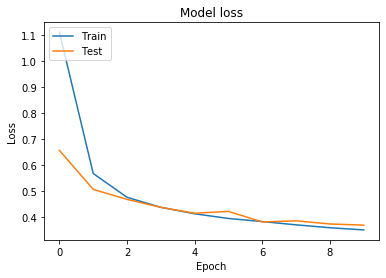

10000/10000 [==============================] - 0s 20us/step

acc: 85.86%

 Confusion Matrix
[[830   1   8  39   4   0  99   0  19   0]
 [  4 946   5  37   4   0   3   0   1   0]
 [ 18   0 688  13 159   1 106   0  15   0]
 [ 21   6   4 897  24   1  42   0   5   0]
 [  0   1  64  47 791   0  89   0   8   0]
 [  0   0   0   1   0 941   0  37   3  18]
 [142   1  68  37  74   0 644   0  34   0]
 [  0   0   0   0   0  37   0 938   0  25]
 [  1   1   1   5   2   3  11   5 971   0]
 [  0   0   0   1   0  15   0  43   1 940]]


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam, Adadelta

model = Sequential()
model.add(Dense(64, input_dim= X_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
keras_model = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(keras_model.history['acc'])
plt.plot(keras_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(keras_model.history['loss'])
plt.plot(keras_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Y_predict = model.predict(X_test)

print('\n Confusion Matrix')
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_predict, axis=1)))

<h4>Model3: Convolutional Neural network</h4>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

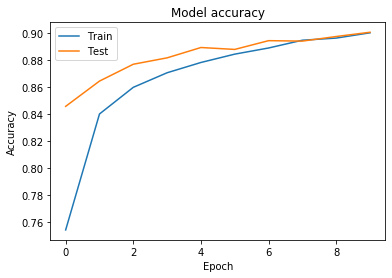

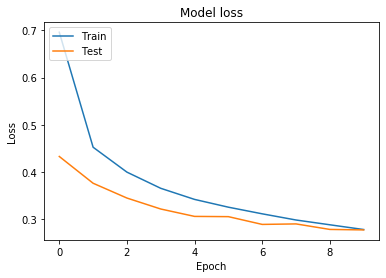

10000/10000 [==============================] - 1s 88us/step
Test loss: 0.2939665240287781
Test accuracy: 0.894

acc: 89.40%

 Confusion Matrix
[[874   1  22  13   4   2  75   0   9   0]
 [  1 968   1  22   3   0   3   0   2   0]
 [ 16   0 825   9  84   0  66   0   0   0]
 [ 18   5  12 895  28   0  36   0   6   0]
 [  1   1  53  31 862   0  52   0   0   0]
 [  0   0   0   0   0 982   0  12   1   5]
 [131   1  82  21  82   0 674   0   9   0]
 [  0   0   0   0   0  27   0 928   1  44]
 [  4   2   2   3   1   3   7   4 974   0]
 [  0   0   0   0   0  11   1  30   0 958]]


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam, Adadelta

X_train_conv = np.copy(X_train).reshape(60000,28,28,1)
X_test_conv = np.copy(X_test).reshape(10000,28,28,1)

filters = 32
filter_size = 3
pool_size = 2

convolutional_model = Sequential()
convolutional_model.add(Conv2D(filters, filter_size, input_shape=(28, 28, 1)))
convolutional_model.add(Conv2D(64, filter_size))
convolutional_model.add(MaxPooling2D(pool_size = pool_size))
convolutional_model.add(Dropout(0.25))
convolutional_model.add(Flatten())
convolutional_model.add(Dense(128, activation='sigmoid'))
convolutional_model.add(Dropout(0.5))
convolutional_model.add(Dense(10, activation='softmax'))


convolutional_model.summary()

# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
convolutional_model.compile(optimizer=Adadelta(), loss='categorical_crossentropy',metrics=['accuracy'])

# Training
convolutional_history = convolutional_model.fit(X_train_conv, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(convolutional_history.history['acc'])
plt.plot(convolutional_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(convolutional_history.history['loss'])
plt.plot(convolutional_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

scores = convolutional_model.evaluate(X_test_conv, y_test,)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print("\n%s: %.2f%%" % (convolutional_model.metrics_names[1], scores[1]*100))

Y_pred = convolutional_model.predict(X_test_conv)

print('\n Confusion Matrix')
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Y_pred, axis=1)))
